### 统计学：检验心理学现象

在下方单元格中回答问题并执行相关代码，你可以 [参考项目指导](https://github.com/udacity/new-dand-advanced-china/blob/master/%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1/%E7%BB%9F%E8%AE%A1%E5%AD%A6%EF%BC%9A%E6%A3%80%E9%AA%8C%E5%BF%83%E7%90%86%E5%AD%A6%E7%8E%B0%E8%B1%A1.md) 并在正式提交前查看 [项目要求](https://review.udacity.com/#!/rubrics/305/view)。提交时请将 Jupyter notebook 导出成 HTML 或者 PDF 进行提交（File -> Download As）。

背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

调查问题

作为一般说明，请确保记录你在创建项目时使用或参考的任何资源。作为项目提交的一部分，你将需要报告信息来源。

(1) 我们的自变量是什么？因变量是什么？

**自变量**：不同的条件，即一致文字条件与不一至文字条件。
**因变量**：不同条件下使用的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

`MU_C`: 表示一致文字条件下所用的总体测试平均时间。    
`MU_I`: 表示不一致文字条件下所用的总体测试平均时间。        
**零假设**：*文字不一致*条件与*一致条件*下所用的总体平均时间没有明显差别，`H0: MU_C = MU_I`。     
**对立假设**： Stroop Effect成立， 两种条件下所用总体平均时间有明显差别， `H1: MU_C < MU_I`。    
该实验中，总体呈正态分布，未知总体标准差，而且样本量小于30，所以需要使用*T检验*，通过样本数据检验是否可拒绝零假设H0。       
t检验下有很多检验类型，这里选择配对t检验，它适合用来针对两组相关样本进行检验。       
这个实验下每名参与者都有两个情况（颜色与文字相同和不同）下的测试时间，这两个测试时间可能都受到这名参与者本身正常的反应时间影响，所以这两组样本属于相关样本。    
配对t检验只关注每对相关数据的差值(c-i)，从而避免得到的结论受到参与人员间正常反应时间独立性的影响。    
在只关注差值集的情况下，样本集只有一组，所以要采用单样本t检验的计算方式进行处理。      

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
from pandas import DataFrame

In [2]:
# 读取数据
df = pd.read_csv('stroopdata.csv')
df['D_Value'] = df.Congruent - df.Incongruent
df

,Congruent,Incongruent,D_Value
0,12.079,19.278,-7.199
1,16.791,18.741,-1.950
2,9.564,21.214,-11.650
3,8.630,15.687,-7.057
4,14.669,22.803,-8.134
5,12.238,20.878,-8.640
6,14.692,24.572,-9.880
7,8.987,17.394,-8.407
8,9.401,20.762,-11.361
9,14.480,26.282,-11.802


In [3]:
df.D_Value.mean() # 平均值

-7.964791666666667

In [4]:
df.D_Value.median() # 中位数

-7.666499999999999

In [5]:
df.D_Value.var() # 方差

23.666540867753632

In [6]:
df.D_Value.std() # 标准差

4.864826910359056

* 集中趋势测量
  * 均值 -7.9648
  * 中位数 -7.6665
* 变异测量
  * 方差 23.6665
  * 标准差 4.8648

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

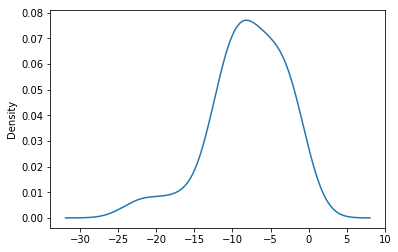

In [9]:
# 在这里创建可视化图表
import matplotlib.pyplot as plt
df.D_Value.plot(kind='kde')

图形近似正态分布，满足t检验的前提要求，众数、均值和中位数都分布在(-10, -5]区间

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [8]:
from scipy import stats
stats.ttest_rel(df.Congruent, df.Incongruent)

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.103000585711178e-08)

选择置信水平为0.05，单尾检测，查t-table可知，df=23的情况下，t临界值=-1.714。

t统计值计算得出t=-8.020706944109957

t值在临界内，并且根据t-table，p值也远小于0.05，所以可以拒绝零假设，也就是可以确认斯特鲁普效应的存在。